c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature nam

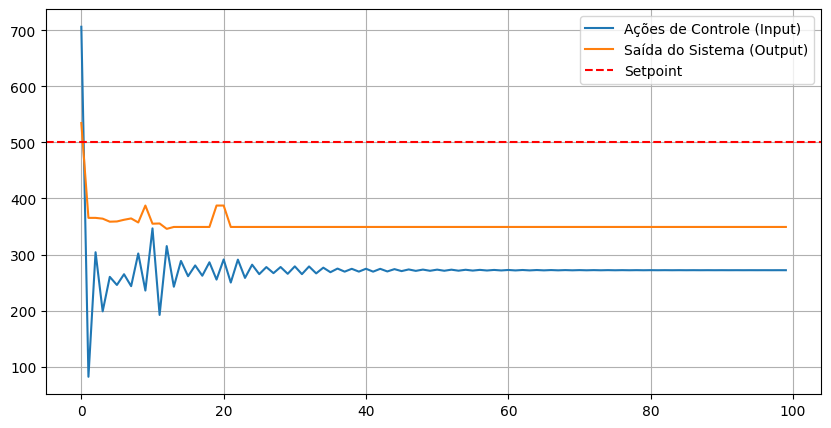

In [8]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Carregar o modelo de previsão (CatBoost ou outro modelo já treinado)
model = joblib.load("../MPC/model.pkl")

# Simulação do Sistema para Controle
class SystemController:
    def __init__(self, model, setpoint=500, n_states=10):
        self.model = model
        self.setpoint = setpoint
        self.n_states = n_states
        self.states = np.zeros(n_states)  # Últimos estados do sistema
        self.control_model = Ridge(alpha=0.1)  # Modelo de controle
        self.train_control_model()
    
    def train_control_model(self):
        # Criando dados sintéticos para treinamento
        X_train = np.random.randint(0, 255, size=(1000, self.n_states))
        y_train = np.array([self.model.predict([x])[0] for x in X_train])
        
        # Treinando um modelo de controle baseado em regressão
        self.control_model.fit(X_train, y_train)
    
    def step(self):
        # Prediz a melhor ação (entrada de controle) para minimizar o erro
        action = self.control_model.predict([self.states])[0]
        self.states = np.roll(self.states, -1)
        self.states[-1] = action
        
        # Simula a resposta do sistema
        y_model = self.model.predict([self.states])[0]
        return action, y_model

# Inicializa o controlador
controller = SystemController(model)

# Teste do modelo treinado
time_steps = 100
actions = []
outputs = []

for _ in range(time_steps):
    action, output = controller.step()
    actions.append(action)
    outputs.append(output)

# Plotar os resultados
plt.figure(figsize=(10, 5))
plt.plot(actions, label='Ações de Controle (Input)')
plt.plot(outputs, label='Saída do Sistema (Output)')
plt.axhline(y=500, color='r', linestyle='--', label='Setpoint')
plt.legend()
plt.grid()
plt.show()